<a href="https://colab.research.google.com/github/msmsm104/TIL/blob/main/20220602/%EC%A0%84%EB%A0%A5%EC%82%AC%EC%9A%A9%EB%9F%89_%EC%98%88%EC%B8%A1(%EC%8B%A4%EC%8A%B5)_%EA%B9%80%EC%9A%A9%EB%8B%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 라이브러리 및 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 분석에 필요한 라이브러리를 불러옵니다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
base_path = '/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/TIL(Today I Learned)/20220602/data/'

train = pd.read_csv(base_path + 'train.csv', encoding='cp949')
test = pd.read_csv(base_path + 'test.csv', encoding='cp949')
submission = pd.read_csv(base_path + 'sample_submission.csv', encoding='cp949')

In [6]:
#Q. 122400의 의미는?
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


### column별 설명
 - num : 건물번호 (1 - 60) 60개의 건물
 - date_time : 시간
 - 전력사용량(kWh) : 시간당 전력사용량 (target) => 회귀(지도학습)
 - 기온, 풍속, 습도, 강수량, 일조 : 기상 정보 (시간당)
 - 비전기냉방설비운영, 태양광보유 : categorical feature (0/1) (건물 정보)


### row - 시간당 사용한 전력 사용량

In [8]:
(122400 / 24)/60 # => 85일임을 알 수 있다.

## 같은 시간을 가지는 데이터가 총 60개씩 있다.

85.0

### column별 설명

 - 기온, 풍속, 습도, 일조 (hr, 3시간), 3시간 당 측정한 값.
 - 강수량 (mm, 6시간) : 6시간당 측정한 값.
 - 비전기냉방설비운영, 태양광보유 : 건물정보

In [9]:
# 7 x 24 x 60

test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
 7   비전기냉방설비운영     2296 non-null   float64
 8   태양광보유         1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


In [11]:
# column 이름 변경
train.columns = ["num", "date_time", "target", "temperature",
                "windspeed", "humidity", "precipitation",
                "insolation", "nelec_cool_flag", "solar_flag"]
test.columns = ["num", "date_time", "temperature",
                "windspeed", "humidity", "precipitation",
                "insolation", "nelec_cool_flag", "solar_flag"]

In [14]:
test.head()

,num,date_time,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. 데이터 전처리

 **무조건 해야하는 것(데이터 전처리 시)**
  - 결측치 처리 : 결측치를 채우거나, 지우거나
  - categorical feature 처리: object형 column은 무조건 숫자로 변환.

### 2-1. 결측치 처리

#### 건물 정보

In [20]:
#건물별로 '비전기냉방설비운영'과 '태양광보유'를 판단해 test set의 결측치를 보간해줍니다
# train[["num", "nelec_cool_flag", "solar_flag"]].groupby('num')["nelec_cool_flag", "solar_flag"].mean()
train[["num", "nelec_cool_flag", "solar_flag"]].drop_duplicates()

# => 건물별로 '비전기냉방설비운영', '태양광보유'가 똑같다

,num,nelec_cool_flag,solar_flag
0,1,0.0,0.0
2040,2,1.0,0.0
4080,3,1.0,1.0
6120,4,1.0,1.0
8160,5,1.0,0.0
10200,6,0.0,0.0
12240,7,1.0,0.0
14280,8,1.0,1.0
16320,9,0.0,1.0
18360,10,1.0,0.0


### 좀 더 스마트한 방법으로 채워보기! 

In [27]:
building_info = train[["num", "nelec_cool_flag", "solar_flag"]].drop_duplicates()



In [30]:
# JOIN?

# test = test.drop(columns=['nelec_cool_flag', 'solar_flag'])
test = pd.merge(test, building_info, on=['num']) ## num column을 기준으로 합침.
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num              10080 non-null  int64  
 1   date_time        10080 non-null  object 
 2   temperature      3360 non-null   float64
 3   windspeed        3360 non-null   float64
 4   humidity         3360 non-null   float64
 5   precipitation    1680 non-null   float64
 6   insolation       3360 non-null   float64
 7   nelec_cool_flag  10080 non-null  float64
 8   solar_flag       10080 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 787.5+ KB


#### 일조량 (insolation)

 - 기상정보 (강수량, 일조량, 풍속, 기온)

In [31]:
# 가장 최근에 기록된 정보로 채워줍니다.
test['temperature']

## => 시간에 따라 자연스럽게 연속적으로 변화하는 feature

0        27.8
1         NaN
2         NaN
3        27.3
4         NaN
         ... 
10075     NaN
10076     NaN
10077    27.9
10078     NaN
10079     NaN
Name: temperature, Length: 10080, dtype: float64

In [36]:
## 자연스럽게 채우는 방법 interpolation
test['temperature'].interpolate(method='pad')
test['temperature'].interpolate(method='linear')
test['temperature'].interpolate(method='quadratic')
## => 가장 적절한 방법이라 생각된다. (linear interpolation) --> 선형보간법

0        27.800000
1        27.806027
2        27.639360
3        27.300000
4        26.787947
           ...    
10075    28.679729
10076    28.313063
10077    27.900000
10078          NaN
10079          NaN
Name: temperature, Length: 10080, dtype: float64

In [ ]:
test.insolation.value_counts()

In [40]:
# dummy = train.copy()
# n = 3
# lst = []
# for num in dummy['temperature']:
#     if n % 3 == 0:
#         lst.append(num)
#         n -= 1
#     else:
#         lst.append(None)
#         n -= 1
#     if n == 0:
#         n = 3
# lst

[17.6,
 None,
 None,
 17.1,
 None,
 None,
 16.7,
 None,
 None,
 19.3,
 None,
 None,
 23.1,
 None,
 None,
 23.8,
 None,
 None,
 22.7,
 None,
 None,
 18.6,
 None,
 None,
 16.6,
 None,
 None,
 15.7,
 None,
 None,
 15.0,
 None,
 None,
 16.9,
 None,
 None,
 16.3,
 None,
 None,
 20.9,
 None,
 None,
 20.6,
 None,
 None,
 19.6,
 None,
 None,
 18.4,
 None,
 None,
 18.2,
 None,
 None,
 17.6,
 None,
 None,
 20.8,
 None,
 None,
 24.4,
 None,
 None,
 27.9,
 None,
 None,
 26.1,
 None,
 None,
 20.5,
 None,
 None,
 20.1,
 None,
 None,
 20.4,
 None,
 None,
 20.1,
 None,
 None,
 20.6,
 None,
 None,
 25.0,
 None,
 None,
 25.4,
 None,
 None,
 22.8,
 None,
 None,
 20.8,
 None,
 None,
 19.7,
 None,
 None,
 19.3,
 None,
 None,
 18.7,
 None,
 None,
 21.0,
 None,
 None,
 25.1,
 None,
 None,
 27.8,
 None,
 None,
 27.9,
 None,
 None,
 23.1,
 None,
 None,
 21.1,
 None,
 None,
 20.1,
 None,
 None,
 19.2,
 None,
 None,
 24.0,
 None,
 None,
 28.2,
 None,
 None,
 30.5,
 None,
 None,
 28.1,
 None,
 None,
 25.2,
 None,

In [ ]:
# def make_train_nan_2(data, columns, n):
    
#     data.loc[data.index % n != 0, columns] = np.nan

In [52]:
dummy = train.copy() # 실험용 train data를 하나 복사합니다.

def make_train_nan(data, columns, n):
    
    mask = [data[columns][i] if i % n == 0 else None for i in range(len(data))]
    data[columns] = mask
    

make_train_nan(dummy, 'temperature', 3)
# make_train_nan(train, [], 6)
make_train_nan(dummy, 'windspeed', 3)
make_train_nan(dummy, 'humidity', 3)
make_train_nan(dummy, 'precipitation', 6)
make_train_nan(dummy, 'insolation', 3)
dummy


,num,date_time,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2020-06-01 02,8107.128,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,NaN,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,NaN,NaN,NaN,NaN,NaN,1.0,1.0
122396,60,2020-08-24 20,3975.696,NaN,NaN,NaN,NaN,NaN,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,NaN,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [53]:
# dummy['temperature'].interpolate(method='li')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   num              122400 non-null  int64  
 1   date_time        122400 non-null  object 
 2   target           122400 non-null  float64
 3   temperature      40800 non-null   float64
 4   windspeed        40800 non-null   float64
 5   humidity         40800 non-null   float64
 6   precipitation    20400 non-null   float64
 7   insolation       40800 non-null   float64
 8   nelec_cool_flag  122400 non-null  float64
 9   solar_flag       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


TypeError: ignored

In [89]:
from sklearn.metrics import mean_squared_error

def compare_interpolation_methods(train, dummy, columns, methods, metric):
    # e.g. column == "windspeed"

    error_lst = []
    error_dict = {}

    for elem in methods:
        if elem == 'quadratic':
            error = metric(train[columns], dummy[columns].interpolate(method=elem).interpolate('linear'))
            error_lst.append(error)
            error_dict[elem] = error
        else:
            error = metric(train[columns], dummy[columns].interpolate(method=elem))
            error_lst.append(error)
            error_dict[elem] = error


    return error_dict
    # return error_dict
compare_interpolation_methods(train, dummy, 'temperature', ['pad', 'linear', 'quadratic'], mean_squared_error)

{'linear': 0.16713658315177923,
 'pad': 0.9265059640522875,
 'quadratic': 0.15850998701955235}

In [67]:
print(mean_squared_error(train.temperature, dummy.temperature.interpolate(method='pad')))
print(mean_squared_error(train.temperature, dummy.temperature.interpolate(method='linear')))
# print(mean_squared_error(train.temperature, dummy.temperature.interpolate(method='quadratic')))

0.9265059640522875
0.16713658315177923


ValueError: ignored

In [68]:

dummy.temperature.interpolate(method='quadratic')

0         17.600000
1         17.480821
2         17.314155
3         17.100000
4         16.838357
            ...    
122395    28.115160
122396    27.715160
122397    27.300000
122398          NaN
122399          NaN
Name: temperature, Length: 122400, dtype: float64

In [94]:
from sklearn.metrics import mean_squared_error

# 1. interpolation 기법별로 에러(틀린 정도)를 계산합니다.
all_error_dict = {}

for column in ['temperature', 'windspeed', 'humidity', 'insolation']:
    methods = ['pad', 'linear', 'quadratic']
    error_dict = compare_interpolation_methods(train, dummy, column, methods, mean_squared_error)
    all_error_dict[column] = error_dict

all_error_df = pd.DataFrame(all_error_dict)
all_error_df
# 2. 계산 결과를 그래프로 그립니다.

,temperature,windspeed,humidity,insolation
pad,0.926506,0.548216,21.611516,0.045982
linear,0.167137,0.326506,5.530952,0.016300
quadratic,0.158510,0.365934,5.433766,0.017218


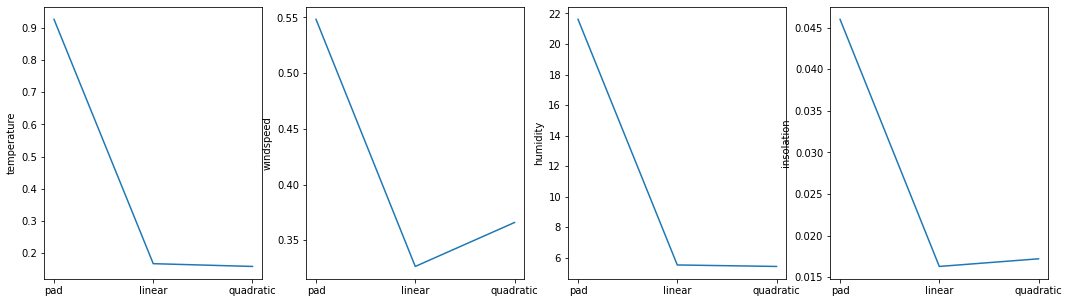

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize = (18, 5))
for i in range(len(all_error_df.columns)):
    sns.lineplot(ax=axes[i], data=all_error_df.iloc[:, i].transpose(), sort=False)


## method = 'linear'로 하는게 가장 좋다.

In [101]:
# 테스트 데이터에 결측치를 채워봅니다!
test.temperature = test.temperature.interpolate(method='quadratic')
# 마지막 NaN을 채우기 위해서 linear interpolation을 적용해줍니다.
test.temperature = test.temperature.interpolate(method='linear')

test.windspeed = test.windspeed.interpolate(method='linear')

test.humidity = test.humidity.interpolate(method='quadratic')
# 마지막 NaN을 채우기 위해서 linear interpolation을 적용해줍니다.
test.humidity = test.humidity.interpolate(method='linear')

test.precipitation = test.precipitation.interpolate(method='linear')

test.insolation = test.insolation.interpolate(method='linear')

In [103]:
dummy

,num,date_time,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2020-06-01 02,8107.128,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,NaN,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,NaN,NaN,NaN,NaN,NaN,1.0,1.0
122396,60,2020-08-24 20,3975.696,NaN,NaN,NaN,NaN,NaN,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,NaN,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [102]:
test

,num,date_time,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0
1,1,2020-08-25 01,27.806027,1.366667,75.017358,0.0,0.000000,0.0,0.0
2,1,2020-08-25 02,27.639360,1.233333,76.350691,0.0,0.000000,0.0,0.0
3,1,2020-08-25 03,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0
4,1,2020-08-25 04,26.787947,1.166667,79.965285,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,28.679729,3.566667,65.645299,0.0,0.533333,1.0,1.0
10076,60,2020-08-31 20,28.313063,3.833333,66.645299,0.0,0.266667,1.0,1.0
10077,60,2020-08-31 21,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0
10078,60,2020-08-31 22,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0


In [ ]:
#요일 변수를 추가해봅니다.
def weekday(x):


+ test 결측치를 채워봅니다.
+ test 데이터의 변수는 예보 데이터이며, 예보 데이터는 train 데이터의 기간에 생성된 것이기에 활용 가능합니다.

1) 평균으로 채우기


2) 최빈값으로 채우기


3) 근처(앞, 뒤)에 있는 값으로 채우기


4) interpolation

### 2-2. 상관관계 분석

In [ ]:
# 피처간 비슷한 변수들이 있는지 확인하기 위해 상관관계 분석을 수행합니다.


In [ ]:
# heatmap


In [ ]:
# 피처간 비슷한 변수들이 있는지 확인하기 위해 상관관계 분석을 수행합니다.
corr = []
for num in range(1,61):
    df = train[train.num==num]
    num_corr = df.corr()['target']
    num_corr = num_corr.drop(['num','nelec_cool_flag','solar_flag','target'])
    corr.append(num_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(1,61))

# 시각화
f, ax = plt.subplots(figsize=(20,8))
plt.title("Correlation between features and target", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax)
plt.xlabel('Building(num)')
plt.show()

### 2-3. 이상치 검출

1) IQR(Inter-Quantile Range)


2) Outlier Detection method (e.g. Isolation Forest)

### IQR 

In [ ]:
# 데이터 중에 전체 데이터의 패턴을 벗어나는 데이터가 있는지 확인합니다.
def get_outlier(data, column, weight=1.5):
    

    
    
    print("IQR은 %.2f이다." % IQR)
    print(f"lower_bound는 {lower_bound:.2f}이다.") # f-string
    print("upper_bound는 {:.2f}이다.".format(upper_bound))
    

    return outlier_idx

In [ ]:
selected_col = input("Which column ? ")
outlier_idx = get_outlier(train, selected_col)
train.loc[outlier_idx, :]

In [ ]:
# outlier detection
# anomaly detection

train.drop(outlier_idx)

### Isolation Forest (ML Model)

In [ ]:
from sklearn.ensemble import IsolationForest

X = train.drop(columns=["num", "date_time", "target"])

model = 

In [ ]:
# IsolationForest로 판단한 outlier들을 제거합니다


## 3. 예측 모델 구현

In [104]:
X = train.drop(columns=['date_time', 'num'])
y = train['target']

In [105]:
# 전력사용량 예측을 위해 회귀 모델을 불러옵니다

from lightgbm.sklearn import LGBMRegressor

model = LGBMRegressor()
model.fit(X, y)
pred = model.predict(X)


In [106]:
mean_squared_error(y, pred)

2722.2996548713445

In [ ]:
# 학습에 필요한 데이터셋을 만듭니다


In [ ]:
# 학습 및 모델 검증을 위해 KFold Cross Validation 기법을 사용합니다.


In [ ]:
# training

reg = LGBMRegressor()

In [107]:
# submission 파일 생성

X_test = test.drop(columns=['num', 'date_time'])

output = model.predict(X_test)

ValueError: ignored